In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy.stats import sem
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm
import os

In [2]:
datapath = Path.cwd() / "data/n_scaling/"
datapath2 = Path.cwd() / "data/N_scaling/"
figurepath = Path.cwd() / "figures"

In [3]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [4]:
def set_size(width='thesis', fraction=1, subplots=(1, 1),aspect_ratio=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    #aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [5]:
def rearrange_data(arr): #
    res = np.swapaxes(arr,-1,-2)
    #res = np.swapaxes(arr,-2,0)
    return res[:,:,0]

In [14]:
fids = []
otoFl = []
ototrue = []
folders = [datapath/"WAHUHA/N = 11",datapath/"WAHUHA/N = 12",datapath/"WAHUHA/N = 13",
            datapath/"Rhim71/N = 11",datapath/"Rhim71/N = 12",datapath/"Rhim71/N = 13",
            datapath/"WAHUHA_FR/N = 11",datapath/"WAHUHA_FR/N = 12",datapath/"WAHUHA_FR/N = 13",
            datapath/"Rhim71_FR/N = 11",datapath/"Rhim71_FR/N = 12",datapath/"Rhim71_FR/N = 13"]
cycles = [1,5,10,50,100,500,1000]
files = [["4682{}_N11_BS.jld2".format(i) for i in range(88,95)],
        ["468{}_N12_BS.jld2".format(i) for i in range(295,309)],
        ["46830{}_N13_BS.jld2".format(i) for i in range(9,10)]+["4683{}_N13_BS.jld2".format(i) for i in range(10,15)]+["4683{}_N13_BS.jld2".format(i) for i in range(16,22)],

        ["4683{}_N11_BS.jld2".format(i) for i in range(23,30)],
        ["4683{}_N12_BS.jld2".format(i) for i in range(30,44)],
        ["4683{}_N13_BS.jld2".format(i) for i in range(44,50)]+["4683{}_N13_BS.jld2".format(i) for i in range(51,57)],

        ["4683{}_N11_BS.jld2".format(i) for i in range(58,65)],
        ["4683{}_N12_BS.jld2".format(i) for i in range(65,79)],
        ["4683{}_N13_BS.jld2".format(i) for i in range(79,84)]+["4683{}_N13_BS.jld2".format(i) for i in range(86,91)],

        ["4683{}_N11_BS.jld2".format(i) for i in range(93,100)],
        ["46840{}_N12_BS.jld2".format(i) for i in range(0,10)]+["4684{}_N12_BS.jld2".format(i) for i in range(10,14)],
        ["4684{}_N13_BS.jld2".format(i) for i in range(14,19)]+["4684{}_N13_BS.jld2".format(i) for i in range(21,25)]
]
Njs = [len(files[i]) for i in range(len(files))]
print(Njs)
for i in range(len(folders)):
    fids.append([])
    for j in range(Njs[i]):
        try:
            with h5py.File(folders[i]/files[i][j],"r") as f:
                fids[i].append(np.asarray(f["fidelities"][()]))
        except:
            print(folders[i]/files[i][j])

fids11W = fids[0]
for j in range(Njs[0]):
    fids11W[j] = np.swapaxes(rearrange_data(fids11W[j]),0,1)
fids11R = fids[3]
for j in range(Njs[3]):
    fids11R[j] = np.swapaxes(rearrange_data(fids11R[j]),0,1)
fids11WCS = fids[6]
for j in range(Njs[6]):
    fids11WCS[j] = np.swapaxes(rearrange_data(fids11WCS[j]),0,1)
fids11RCS = fids[9]
for j in range(Njs[9]):
    fids11RCS[j] = np.swapaxes(rearrange_data(fids11RCS[j]),0,1)

# fids12W = fids[1]
# for j in range(Njs[1]):
#     fids12W[j] = np.swapaxes(rearrange_data(fids12W[j]),0,1)
# fids12R = fids[4]
# for j in range(Njs[4]):
#     fids12R[j] = np.swapaxes(rearrange_data(fids12R[j]),0,1)
# fids12WCS = fids[7]
# for j in range(Njs[7]):
#     fids12WCS[j] = np.swapaxes(rearrange_data(fids12WCS[j]),0,1)
# fids12RCS = fids[10]
# for j in range(Njs[10]):
#     fids12RCS[j] = np.swapaxes(rearrange_data(fids12RCS[j]),0,1)

# fids13W = fids[2]
# for j in range(Njs[2]):
#     fids13W[j] = np.swapaxes(rearrange_data(fids13W[j]),0,1)
# fids13R = fids[5]
# for j in range(Njs[5]):
#     fids13R[j] = np.swapaxes(rearrange_data(fids13R[j]),0,1)
# fids13WCS = fids[8]
# for j in range(Njs[8]):
#     fids13WCS[j] = np.swapaxes(rearrange_data(fids13WCS[j]),0,1)
# fids13RCS = fids[11]
# for j in range(Njs[11]):
#     fids13RCS[j] = np.swapaxes(rearrange_data(fids13RCS[j]),0,1)

[7, 14, 12, 7, 14, 12, 7, 14, 10, 7, 14, 9]


In [79]:
file = datapath/"Rhim71/long/515501_N11_BS.jld2"
with h5py.File(file,"r") as f:
    fids11Rlong = np.asarray(f["fidelities"][()])
file = datapath/"Rhim71_FR/long/515502_N11_BS.jld2"
with h5py.File(file,"r") as f:
        fids11RCSlong = np.asarray(f["fidelities"][()])

In [80]:
folders = [datapath2/"Rhim",datapath2/"Rhim_FR",datapath2/"WAHUHA",datapath2/"WAHUHA_FR"]

fidR = {}
for file in os.listdir(folders[0]):
    if ".jld2" in file:
        with h5py.File(folders[0]/file) as f:
            system_size = int(file.split("_")[1].replace("N",""))
            if system_size in fidR.keys():
                fidR.update({system_size:np.concatenate((fidR[system_size],np.swapaxes(f["fidelities"][()],0,-1)),axis=-1)})
            else:
                fidR.update({system_size:np.swapaxes(f["fidelities"][()],0,-1)})

fidRCS = {}
for file in os.listdir(folders[1]):
    if ".jld2" in file:
        with h5py.File(folders[1]/file) as f:
            system_size = int(file.split("_")[1].replace("N",""))
            if system_size in fidRCS.keys():
                fidRCS.update({system_size:np.concatenate((fidRCS[system_size],np.swapaxes(f["fidelities"][()],0,-1)),axis=-1)})
            else:
                fidRCS.update({system_size:np.swapaxes(f["fidelities"][()],0,-1)})

fidW = {}
for file in os.listdir(folders[2]):
    if ".jld2" in file:
        with h5py.File(folders[2]/file) as f:
            system_size = int(file.split("_")[1].replace("N",""))
            if system_size in fidW.keys():
                fidW.update({system_size:np.concatenate((fidW[system_size],np.swapaxes(f["fidelities"][()],0,-1)),axis=-1)})
            else:
                fidW.update({system_size:np.swapaxes(f["fidelities"][()],0,-1)})

fidWCS = {}
for file in os.listdir(folders[3]):
    if ".jld2" in file:
        with h5py.File(folders[3]/file) as f:
            system_size = int(file.split("_")[1].replace("N",""))
            if system_size in fidWCS.keys():
                fidWCS.update({system_size:np.concatenate((fidWCS[system_size],np.swapaxes(f["fidelities"][()],0,-1)),axis=-1)})
            else:
                fidWCS.update({system_size:np.swapaxes(f["fidelities"][()],0,-1)})

In [81]:
ns = [1,5,10,50,100,500,1000]
Ns = [2,3,4,5,6,7,8,9,10,11,12,13]
T = np.arange(0.1,20.1,0.1)
Tlong = np.arange(0.1,50.1,0.1)
Nstates11 = 50
Nstates12 = 25

In [82]:
fids11RCSlong.shape

(50, 1, 500)

In [83]:
fidmin = 0.95
Tmaxs11W = np.zeros((Njs[0],Nstates11))
Tmaxs11R = np.zeros((Njs[3],Nstates11))
Tmaxs11WCS = np.zeros((Njs[6],Nstates11))
Tmaxs11RCS = np.zeros((Njs[9],Nstates11))
TmaxlongR = np.zeros(50)
TmaxlongRCS = np.zeros(50)


for j in range(Njs[0]):
    for s in range(Nstates11):
        Tmaxs11W[j,s]=T[np.argmin(np.abs(fids11W[j][:,s]-fidmin))]
for j in range(Njs[3]):
    for s in range(Nstates11):
        Tmaxs11R[j,s]=T[np.argmin(np.abs(fids11R[j][:,s]-fidmin))]
for j in range(Njs[6]):
    for s in range(Nstates11):
        Tmaxs11WCS[j,s]=T[np.argmin(np.abs(fids11WCS[j][:,s]-fidmin))]
for j in range(Njs[9]):
    for s in range(Nstates11):
        Tmaxs11RCS[j,s]=T[np.argmin(np.abs(fids11RCS[j][:,s]-fidmin))]
for s in range(Nstates11):
    TmaxlongR[s]=Tlong[np.argmin(np.abs(fids11Rlong[s,0,:]-fidmin))]
    TmaxlongRCS[s]=Tlong[np.argmin(np.abs(fids11RCSlong[s,0,:]-fidmin))]



Tmaxmean11W = np.mean(Tmaxs11W,axis=1)
Tmaxstd11W = np.std(Tmaxs11W,axis=1,ddof=1)/np.sqrt(50)
Tmaxmean11R = np.mean(Tmaxs11R,axis=1)
Tmaxstd11R = np.std(Tmaxs11R,axis=1,ddof=1)/np.sqrt(50)
Tmaxmean11WCS = np.mean(Tmaxs11WCS,axis=1)
Tmaxstd11WCS = np.std(Tmaxs11WCS,axis=1,ddof=1)/np.sqrt(50)
Tmaxmean11RCS = np.mean(Tmaxs11RCS,axis=1)
Tmaxstd11RCS = np.std(Tmaxs11RCS,axis=1,ddof=1)/np.sqrt(50)
Tmaxmean11RCS = np.mean(Tmaxs11RCS,axis=1)
Tmaxstd11RCS = np.std(Tmaxs11RCS,axis=1,ddof=1)/np.sqrt(50)
TmaxmeanlongR = np.mean(TmaxlongR,axis=0)
TmaxstdlongR = np.std(TmaxlongR,axis=0,ddof=0)/np.sqrt(50)
TmaxmeanlongRCS = np.mean(TmaxlongRCS,axis=0)
TmaxstdlongRCS = np.std(TmaxlongRCS,axis=0,ddof=1)/np.sqrt(50)

In [84]:
TmaxsWCS = np.zeros((len(Ns),50))
TmaxsRCS = np.zeros((len(Ns),50))
TmaxsW = np.zeros((len(Ns),50))
TmaxsR = np.zeros((len(Ns),50))


for ind,Ni in enumerate(Ns):
    for s in range(50):
        TmaxsRCS[ind,s] = T[np.argmin(np.abs(fidRCS[Ni][:,0,s]-fidmin))]
        TmaxsWCS[ind,s] = T[np.argmin(np.abs(fidWCS[Ni][:,0,s]-fidmin))]
        TmaxsR[ind,s] = T[np.argmin(np.abs(fidR[Ni][:,0,s]-fidmin))]
        TmaxsW[ind,s] = T[np.argmin(np.abs(fidW[Ni][:,0,s]-fidmin))]

TmaxRCS_mean = np.mean(TmaxsRCS,axis=1)
TmaxWCS_mean = np.mean(TmaxsWCS,axis=1)
TmaxR_mean = np.mean(TmaxsR,axis=1)
TmaxW_mean = np.mean(TmaxsW,axis=1)
TmaxlongR_mean = np.mean(TmaxlongR,axis=1)
TmaxlongRCS_mean = np.mean(TmaxlongRCS,axis=1)
TmaxRCS_std = np.std(TmaxsRCS,axis=1,ddof=1)/np.sqrt(50)
TmaxWCS_std = np.std(TmaxsWCS,axis=1,ddof=1)/np.sqrt(50)
TmaxR_std = np.std(TmaxsR,axis=1,ddof=1)/np.sqrt(50)
TmaxW_std = np.std(TmaxsW,axis=1,ddof=1)/np.sqrt(50)

AxisError: axis 1 is out of bounds for array of dimension 1

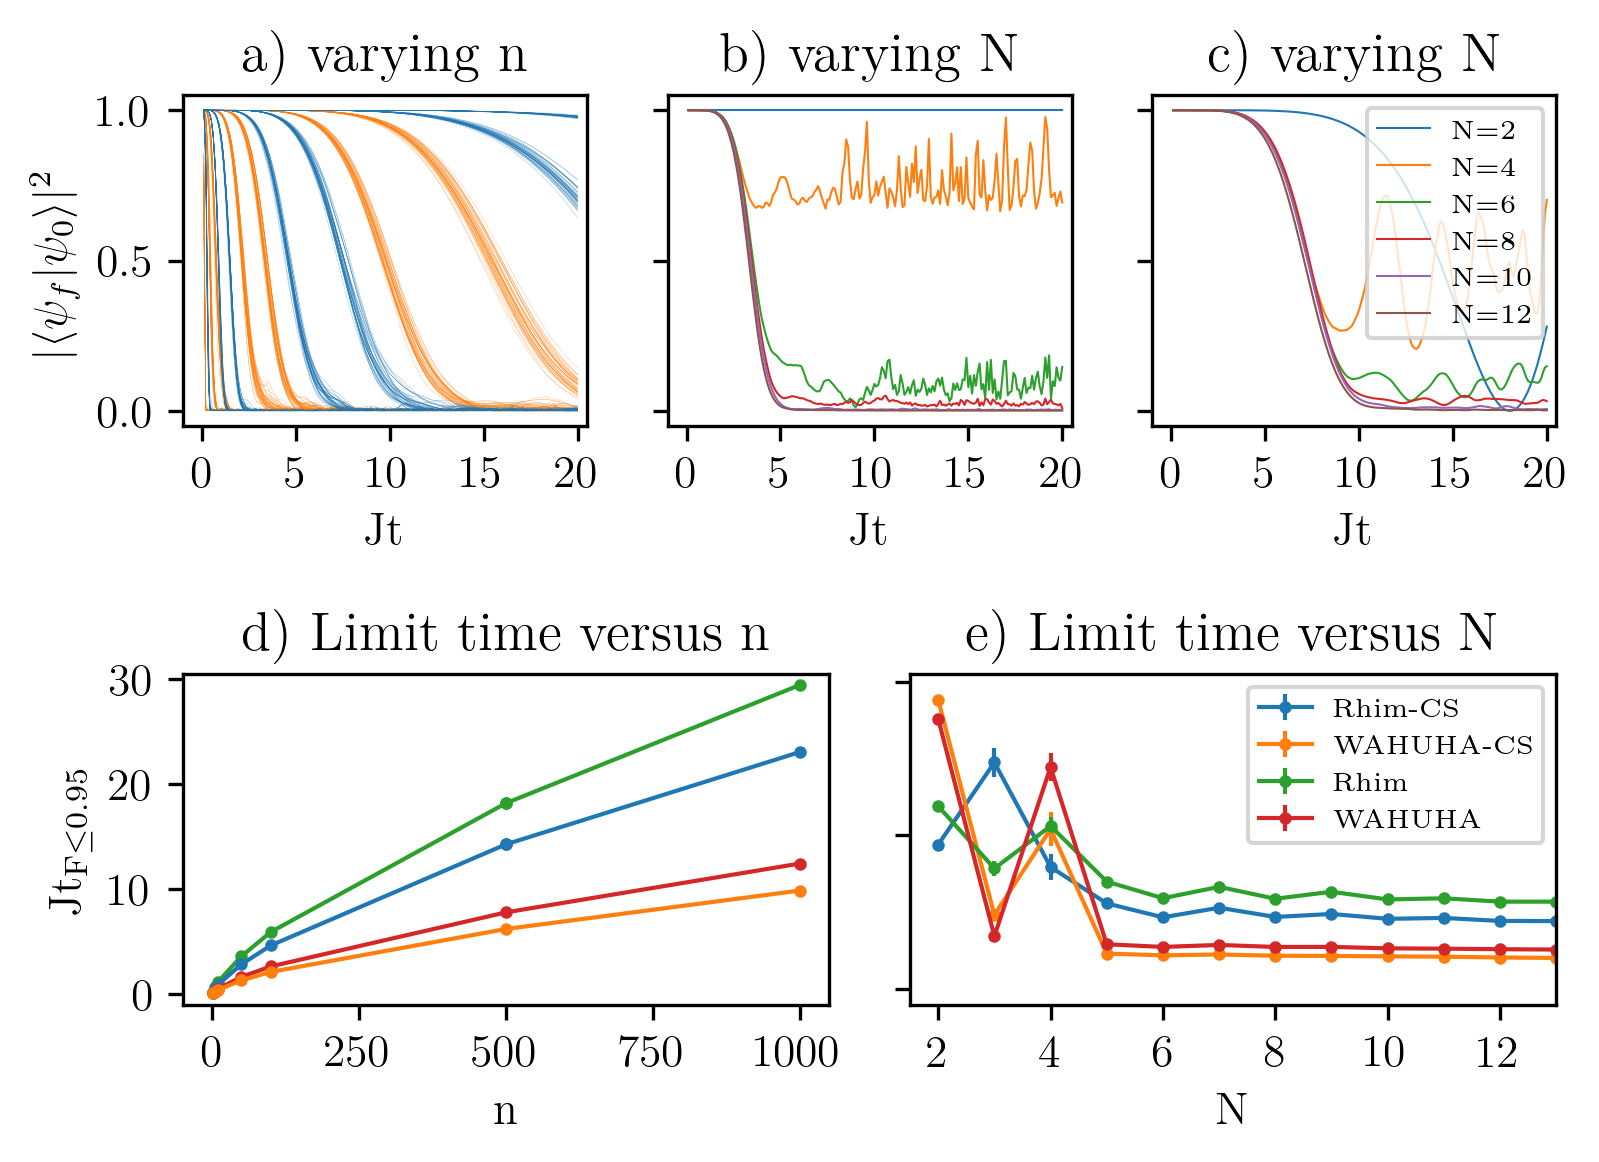

In [113]:
fig = plt.figure(figsize = set_size(subplots=(2,3)),dpi = 300)
gs = gridspec.GridSpec(2, 6,figure=fig)
gs.update(wspace=0.5, hspace=0.75)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:6])
ax4 = plt.subplot(gs[1, 0:3])
ax5 = plt.subplot(gs[1, 3:6])

for j in range(Njs[9]):
    ax1.plot(T,fids11WCS[j],c="C1",lw=0.1,alpha=0.5)
for j in range(Njs[6]):
    ax1.plot(T,fids11RCS[j],c="C0",lw=0.1,alpha=0.5)

ax1.set_xlabel("Jt")
ax1.set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")
ax1.set_xlim(0-1,20+0.5)
ax1.set_ylim(0-0.05,1+0.05)
ax1.set_xticks([0,5,10,15,20])
ax1.set_title("a) varying n")

for j in Ns:
    if j%2 == 0:
        ax2.plot(T,np.mean(fidWCS[j],axis=2)[:,0],lw=0.5,label="N={}".format(j))

ax2.set_xlabel("Jt")
ax2.set_xlim(0-1,20+0.5)
ax2.set_ylim(0-0.05,1+0.05)
ax2.set_yticklabels([])
ax2.set_xticks([0,5,10,15,20])
ax2.set_title("b) varying N")



for j in Ns:
    if j%2 == 0:
        ax3.plot(T,np.mean(fidRCS[j],axis=2)[:,0],lw=0.5,label="N={}".format(j))

ax3.set_xlabel("Jt")
ax3.set_xlim(0-1,20+0.5)
ax3.set_ylim(0-0.05,1+0.05)
ax3.set_yticklabels([])
ax3.set_xticks([0,5,10,15,20])
ax3.set_title("c) varying N")

ax3.legend(loc="best",fontsize="xx-small")


ax4.plot(ns[:-1],Tmaxmean11R[:-1],label="Rhim",lw=1,c="C2",marker="o",ms=2)
ax4.plot([500,1000],[18.186000000000003,29.448000000000008],lw=1,c="C2",marker="o",ms=2)

ax4.plot(ns[:-1],Tmaxmean11RCS[:-1],label="Rhim-CS",lw=1,c="C0",marker="o",ms=2)
ax4.plot([500,1000],[14.266000000000002,23.060000000000006],lw=1,c="C0",marker="o",ms=2)

ax4.plot(ns,Tmaxmean11W,label="WAHUHA",lw=1,c="C3",marker="o",ms=2)
ax4.plot(ns,Tmaxmean11WCS,label="WAHUHA-CS",lw=1,c="C1",marker="o",ms=2)

ax4.set_xticks([0,250,500,750,1000])
ax4.set_ylim(0-1,30+0.5)
ax4.set_yticks([0,10,20,30])
ax4.set_ylabel(r"$\mathrm{Jt_{F\leq0.95}}$")
ax4.set_xlabel("n")
ax4.set_title("d) Limit time versus n")

ax5.errorbar(Ns,TmaxRCS_mean,yerr=TmaxRCS_std,c="C0",label="Rhim-CS",marker="o",ms=2,lw=1)
ax5.errorbar(Ns,TmaxWCS_mean,yerr=TmaxWCS_std,c="C1",label="WAHUHA-CS",marker="o",ms=2,lw=1)
ax5.errorbar(Ns,TmaxR_mean,yerr=TmaxR_std,c="C2",label="Rhim",marker="o",ms=2,lw=1)
ax5.errorbar(Ns,TmaxW_mean,yerr=TmaxW_std,c="C3",label="WAHUHA",marker="o",ms=2,lw=1)

ax5.legend(fontsize="xx-small",loc="upper right")
ax5.set_xlim(2-0.5,13)
ax5.set_xticks([2,4,6,8,10,12])
ax5.set_ylim(0-1,20+0.5)
ax5.set_yticklabels([])
ax5.set_xlabel("N")
ax5.set_title("e) Limit time versus N")

plt.savefig(figurepath/"Nn_scaling.png",format="png",bbox_inches='tight',dpi=600)
plt.show()

In [92]:
[Tmaxmean11RCS[-1],TmaxmeanlongRCS]

[20.000000000000004, 23.060000000000006]

In [104]:
Tmaxmean11R[:-1]

array([ 0.2  ,  0.7  ,  1.152,  3.602,  5.912, 18.186])

In [105]:
Tmaxmean11R[-2]

18.186000000000003

In [106]:
TmaxmeanlongR

29.448000000000008